# Basit Lineear Regresyona Giriş

Basit bir $y=mx+b$ uydurma doğrusunun nasıl oluşturulacağını öğreneceğiz ve ne tür sorulara yanıt verebileceğini anlamak için her adımı dikkatle inceleyeceğiz.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basit Veri

Örnek veri, ISLR kitabının 3.bölümünden alınmıştır. Bu veriler haftalık **TV, radyo** ve **gazete** medyaları için harcanan **reklam** harcamalarının (bin dolar) bir fonksiyonu olarak ürün satış miktarını (bin birim) gösterir.

**Öncelikler veri setimizi okuyup df'e atayalım**

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Tabloda medya türlerine göre haftalık reklam harcamaları ve elde edilen ürün satış miktarları görülmektedir.

**_Toplam_ reklam harcaması ile *satışlar* arasında bir ilişki var mı?**

Sorusuna cevap arayacağız. Elde ettiğimiz cevaba göre, bir korelasyon yoksa reklama para harcamak istemeyiz dimi!

Bu soruyu cevaplamak için öncelikle 3 tür reklam harcamasını (özellik) tek toplam harcama özelliği  olarak birleştireceğiz. 

In [5]:
# Haftalık toplam reklam harcalamaları:

df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [6]:
df.head() # tabloya total_spend sütunun eklendiğini görüyoruz.

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [7]:
df.describe()

,TV,radio,newspaper,sales,total_spend
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,200.860500
std,85.854236,14.846809,21.778621,5.217457,92.985181
min,0.700000,0.000000,0.300000,1.600000,11.700000
25%,74.375000,9.975000,12.750000,10.375000,123.550000
50%,149.750000,22.900000,25.750000,12.900000,207.350000
75%,218.825000,36.525000,45.100000,17.400000,281.125000
max,296.400000,49.600000,114.000000,27.000000,433.600000


Böylece toplam harcama (total_spend) sütunu olarak tabloya mevcut olmayan yeni bir özellik eklemiş olduk. Artık sadece $x$ toplam harcama özellik vektörü ve $y$ satış vektörünü ele alarak, toplam harcama ile satışlar arasında bir ilişki olup olmadığını inceleyebiliriz.

**Bu ilişkiyi görsel olarak görmek için dağılım (scatterplot) grafiğini çizelim.**

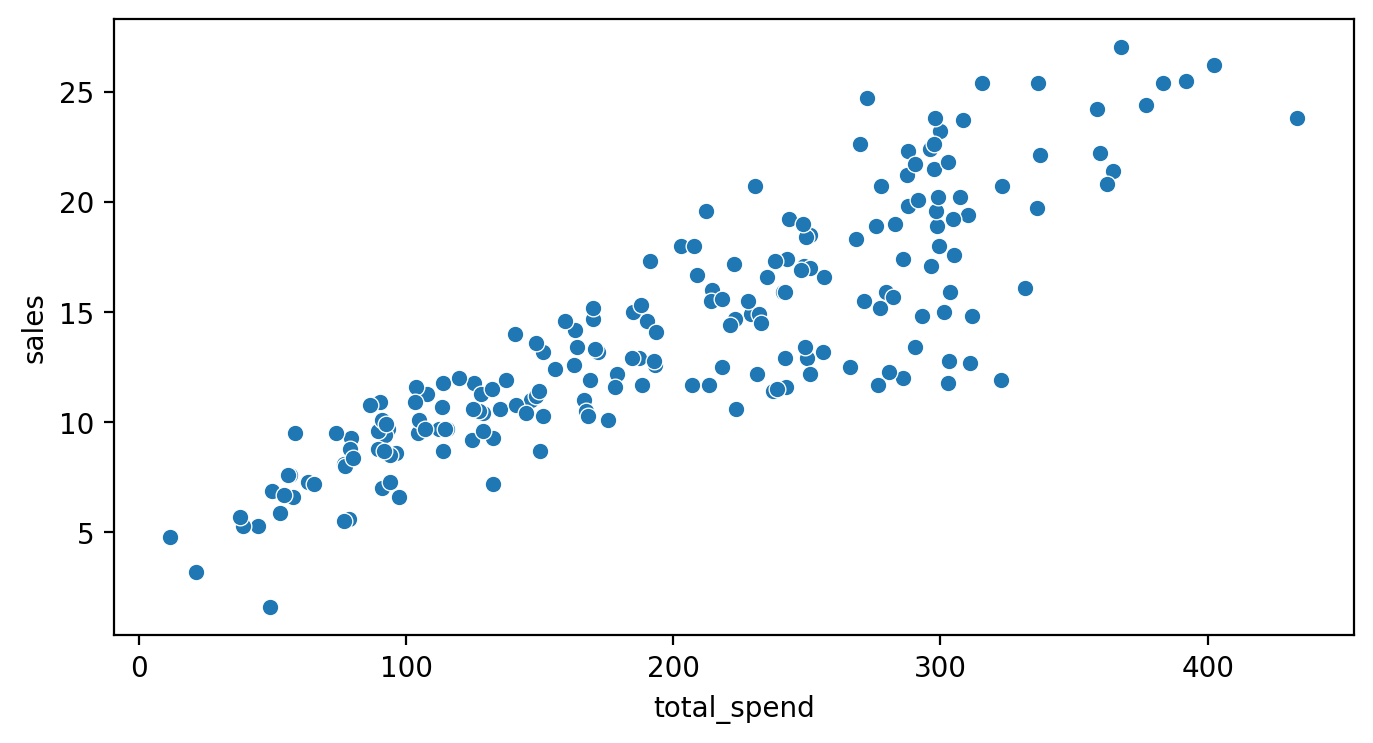

In [9]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(x='total_spend',y='sales',data=df);

Dağılım grafiğinden, reklam harcaması artarken ürün satış miktarının da arttığını, yani iki büyüklük arasında pozitif bir regresyon (ilişki) olduğu görülür. 

## En Küçük Kareler Doğruları


m**En uygun doğrunun ne olduğunu anlama:**

- **Yeni bir 200\\$ toplam reklam harcaması yapmak istersek buna karşılık kaç birim satış yapmayı beklemeliyiz?**

Bu sorunun cevabı, regresyon doğrusunun elde edilmesiyle verilebilir. 

Görsel olarak regresyon doğrusunu anlamak için dağılım grafiğini ve en iyi uyum doğrusunu birlikte gösteren seeborn kütüphanesinin **regplot** grafiğini kullanalım.

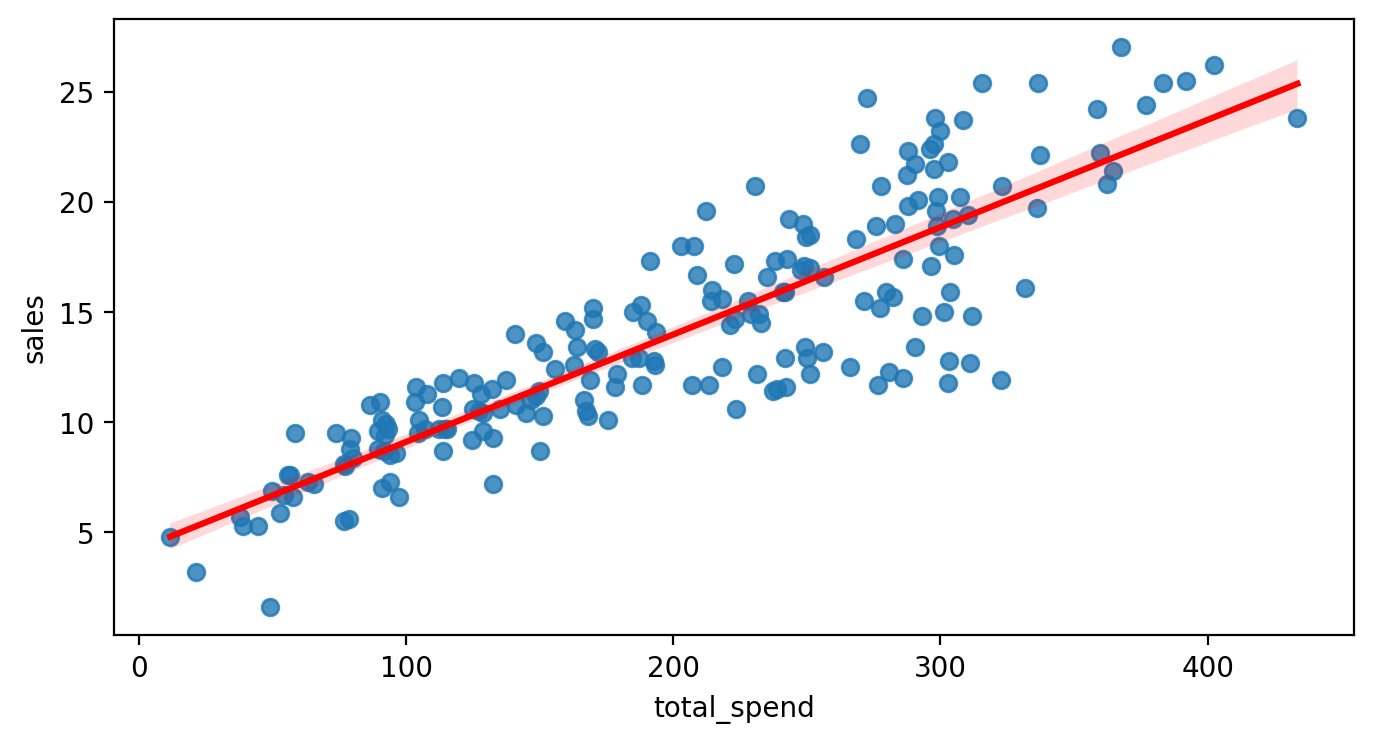

In [10]:
plt.figure(figsize=(8,4),dpi=200)
sns.regplot(x='total_spend',y='sales',data=df,line_kws={'color':'red'});

Öyleyse şu soruyu cevaplayalım: 

**"Bu doğrunun ne olduğunu nasıl hesaplayabiliriz?" veya "$X$'ler için beklenen $y$ ne olacaktır?"**

Doğruyu oluştrumak için eğimini $m$ ve kesim noktasını $b$ belirlemeliyiz. Doğru denklemini 
$$ \hat{y} = \beta_0 X + \beta_1\tag{Genelleştirilmiş OLS}$$
genelleştirilmiş biçimi için çözelim $(m = \beta_0, b = \beta_1)$.

Elimizde bir etiket vektörü (satış sayısı) $y$ ve $X$ özellik vektörü (toplam harcama) var.  $\hat y$  tahmini (prediction veya estimation) için *$\beta$* katsayılarını çözeceğiz.

Bu işlemler için NumPy'ı kullanabiliriz (elle çözmek isterseniz: [Analitik Çözümü](https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf))

In [11]:
# Öncelikle, veri çerçevemizden $X$ özelliğini ve $y$ etiketini ayıralım:
X = df['total_spend']
y = df['sales']

m$X$ ve $y$'yi tanımladığımıza göre, sıradan en küçük kareler denklemini (OLS) numpy'ın **np.polyfit** fonksiyonunun yardımı ile çözebiliriz. 

**np.polyfit** 'ın dökümanına bakılırsa, en küçük kareler polinom uyumu yaptığını görürüz. Polinom uyumu yapmasının nedeni, sadece $X$ 'e değil, aynı zamanda $X^2$ 'ye veya $X^3$ 'e vb. de uydurma yapılabilmesidir.

In [13]:
#help(np.polyfit)

In [14]:
# polinomun 1.derceden olduğunu deg parameteresi ile belirtiriz --> y = b0 x + b1
beta = np.polyfit(X,y,deg=1)

In [15]:
# fonksiyon X ve y vektörlerine karşılık en iyi uyum doğrusunun katsayılar dizisini döndürür
beta

array([0.04868788, 4.24302822])

En iyi uyum doğrusunun $\beta$ katsayıları, sırasıyla, $m = \beta_0=0.048\ldots$ ve $b = \beta_1=4.243\ldots$.

Artık herhangi bir reklam harcaması (toplam harcama aralığındaki) için satışları bu en iyi uyum doğrusunu kullanarak tahmin edebiliriz. 

In [17]:
X.nlargest(1) # En büyük toplam harcama değerini alma

101    433.6
Name: total_spend, dtype: float64

Bu doğruyu, $X$, 0'dan X.nlargest(1)\\$'a kadar olan toplam harcama (potential_spend) dizisine karşılık tahmini satış (predicted_sales) miktarı noktalarını alarak çizebiliriz. 

In [18]:
# Potansiyel Gelecek Harcamalar Dizisi
potential_spend = np.linspace(0,X.nlargest(1),100)

In [19]:
# 100 değerli potansiyel tahmini satış dizisi 
predicted_sales = beta[0] * potential_spend + beta[1]

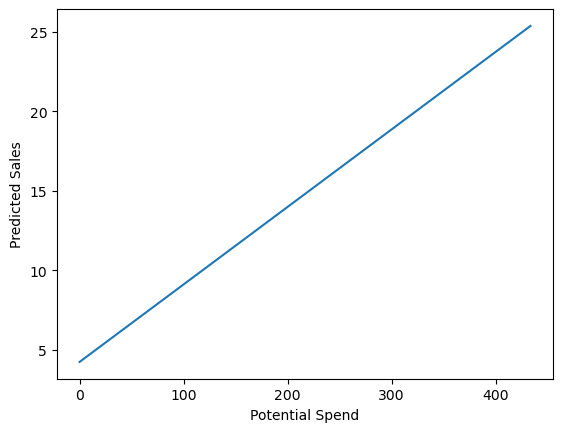

In [20]:
# Regresyon (en iyi uyum) doğrusunu çizme
plt.plot(potential_spend,predicted_sales)
plt.xlabel('Potential Spend')
plt.ylabel('Predicted Sales');

**Dağılım grafiği üzerinde regresyon doğrusunu çizme:**

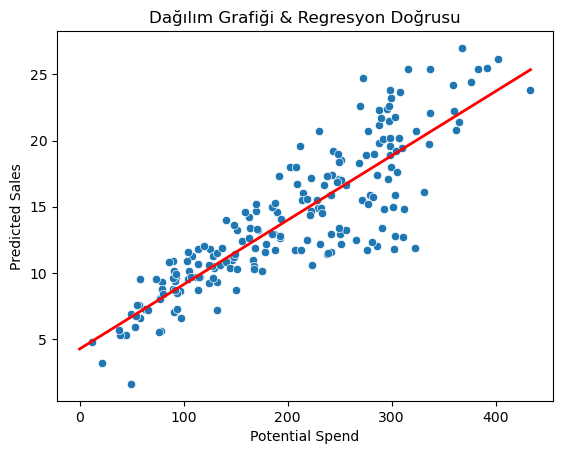

In [22]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red',lw=2)
plt.xlabel('Potential Spend')
plt.ylabel('Predicted Sales')
plt.title('Dağılım Grafiği & Regresyon Doğrusu');

**Yeni bir 200\\$ toplam reklam harcaması yapmak istersek buna karşılık kaç birim satış yapmayı beklemeliyiz?**

Sorusuna şimdi regresyon doğrusunu kullanarak tahmini bir cevap verebiliriz.

In [23]:
spend = 200 # yeni bir toplam reklam harcaması
predicted_sales =  beta[0] * spend + beta[1] # Tahmini ürün satış miktarı
predicted_sales

13.98060407984596

In [24]:
count = np.round(predicted_sales*1000,1)
print(f'Tahmini Satış Miktarı = {count} adet.')

Tahmini Satış Miktarı = 13980.6 adet.


Ürün satış miktarı tahmini için 13.98 (bin) değerinin iyi bir değer olup olmadığını gerçekten nasıl belirleyebiliriz? 

Bunun için makine öğrenmesine genel bakış bölümünde tartıştığımız gibi, **train|test** bölmesi yapmamız gerektiği açıktır. Bunu sıradan en küçük karelerle yapamayız. Dolayısıyla şu anda, performansı gerçekten ölçme ve aşırı mı yoksa yetersiz mi uyum sağladığını anlama konusunda ciddi eksikliklerimiz var. 

### Daha sonra ayrıntılı olarak inceleyeceğimiz hususlar!
 1. Performans Ölçümü - şu anda elimizde sadece bir doğru var, peki bu tahmin değeri gerçekte ne kadar iyi?
 2. Overfitting (Aşırı uyum) ve Underfitting (Yetersiz uyum)

**deg=1** uydurması bir doğrudur, peki daha yüksek derece bir uydurma daha iyi bir uyum anlamına gelir mi? Aşırı uyum mümkün mü? Yetersiz uyum? Nasıl bileceğiz ve iyi uyumu nasıl tanımlayacağız?

In [26]:
# Tek özellikli veriye 3.dereceden polinom uydurma
beta = np.polyfit(X,y,3)
# y = b0*x^3 + b1*x^2 + b2*x + b3
beta 

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [27]:
# Potansiyel Gelecek Harcama Bütçeleri
potential_spend = np.linspace(0,X.nlargest(1),100)

In [28]:
predicted_sales = beta[0]*potential_spend**3 + beta[1]*potential_spend**2 + beta[2]*potential_spend + beta[3]

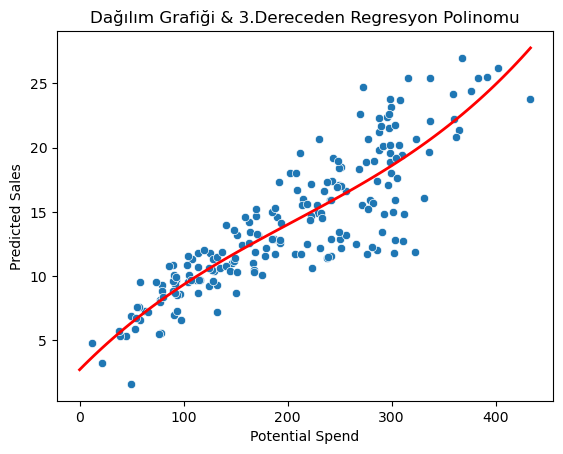

In [29]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red',lw=2)
plt.xlabel('Potential Spend')
plt.ylabel('Predicted Sales')
plt.title('Dağılım Grafiği & 3.Dereceden Regresyon Polinomu');

In [30]:
spend = 200
predicted_sales = beta[0]*spend**3 + beta[1]*spend**2 + beta[2]*spend + beta[3]

In [31]:
predicted_sales

14.007898862563936

In [32]:
yhat = beta[0]*X**3 + beta[1]*X**2 + beta[2]*X + beta[3]

In [33]:
error = sum((y - yhat)**2)/len(X)
np.sqrt(error)

2.566583662240619

Şu an iki modelimiz var ve görsel olarak, doğrusal uyumun, polinom uyumdan daha iyi olup olmadığını söyleyemiyoruz. Bu da **hata** ve **daha iyi uyumun** ne olduğunu sayısal olarak hesaplamamız gerektiği anlamına gelir. 

**3.dereceden polinom uydurma, doğru uydurmadan daha mı iyi? Bunu ölçmenin yolları nelerdir?**

## Çoklu Özellikler

Gerçekte verimiz 3 özelliğe sahip, bu üç özellik için bir regresyon doğrusu oluşturmamız daha doğru bir sonuç almamızı sağlar mı?

Bu soruya np.polyfit fonksiyonunu kullanarak cevap veremeyiz.

In [35]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [36]:
# X Özellikler matrisimiz ve verinin 3 özelliğini sütunlarında içerir
np.polyfit(X,y,1)

TypeError: expected 1D vector for x

# SON!